<a href="https://colab.research.google.com/github/MiriamToledo/AA_PRACTICA1_GRUPO_5/blob/main/AA_PRACTICA2_GRUPO_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Redes de Neuronas Convolucionales

### Grupo 5
### Miriam Toledo
### Inés Sánchez
A continuación, vamos a crear un modelo de red de neuronas convolucionales artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Para ello vamos emplear Keras, específicamente el conjunto de datos Fashion-MNIST.
## 1- IMPORTAMOS TODAS LAS LIBRERÍAS NECESARIAS 
También nos aseguramos de ejecutar la versión 2.0.0 de TensorFlow.


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras import layers
import numpy as np

2.7.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.7.0


## 2- CARGAMOS EL CONJUNTO DE DATOS Y ANALIZAMOS QUE TENGAN LA FORMA ESPERADA

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(len(train_labels))
# Vemos la matriz de la imagen número 1500
print(train_images[1500])
num = train_labels[1500]
print(num)

(60000, 28, 28)
60000
[[  0   0   0   0   0   0   0   0   0  59 144 141 146 149 163 150  58  70
   92   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  87 139 165 176 176 177 204 133 114
  129   8   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 136 194 161 158 195 130 182 158 198
  184  87   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 183 160 148 164 110 165 154 157
  163  65   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 185 137 139 164 162 159 176 162 147
  150  62   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17 198 157 168 165 202 218 171 166 156
  164  71   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  59 181 116 151 155 214 193 202 159 123
  147  58   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72 158 105 136 161 138 181 230 146 119
  134  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  85 144 

La clasificación corresponde con:


0.   Camiseta /Top
1. Pantalón
2. Jersey
3. Vestido
4. Abrigo
5. Sandalia
6. Camisa
7. Zapatillas
8. Bolsa
9. Botas tobilleras

Cada imagen tiene una única etiqueta. Cremaos class_names para poder usarlos a la hora de visualizar las imágnes. Y comprobamos que efectivamente la etiqueta 1 corresponde con un pantalón. 




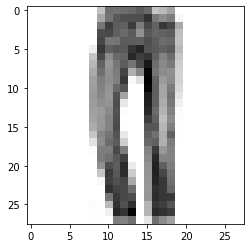

In [4]:
class_names = ['Camiseta', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Zapatillas', 'Bolsa', 'Botas tobilleras']
digit = train_images[1500]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos la forma de los datos de prueba y tienen la misma forma que los datos de entrenamiento.

In [5]:
print(test_images.shape)
print(len(test_labels))


(10000, 28, 28)
10000



A continuación configuramos los datos normalizándolos, convirtiendo los tensores 2D a tensores 3D utilizando reshape. 

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


## 3- CONSTRUCCIÓN DE LA RNA
### 3.1 - Caso 1
Esta red neuronal tiene 32 filtros en la primera capa convolucional y 64 en la segunda, la función de activación de las dos primeras capas convolucionales es *relu* y de la última capa densa es *softmax*. El optimizador es *sgd*, la función de perdida es *sparse_categorical_crossentropy*, la métrica es *accuracy* y el número de iteraciones es 5.

In [7]:
red1 = Sequential()
red1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
red1.add(MaxPooling2D((2, 2)))
red1.add(Conv2D(64, (5, 5), activation='relu'))
red1.add(MaxPooling2D((2, 2)))
red1.add(Flatten())
red1.add(Dense(10, activation='softmax'))
red1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

La función red1.summary() nos indica:


*   832 = (5 x 5 de matriz W + 1 del bias) x 32 filtros
*   0 => No hay parámetros que aprender porque es una operación max pooling
*   La red convolucional 2 es 8 x 8, dado que partimos de una matriz 12 x 12 en una ventana 5 x5 con un stride = 1.
*   51264 = (5 x 5 de matriz W x 32 filtros anteriores +  1 del bias) x 64 filtros
*   10250 = 10 x 1024 + 10, porque tenemos 10 neuronas de la capa softmax, 1024 = 4 x 4 x 64, y les sumamos 10 del sesgo.
*   62346 = 832 + 51264 + 10250 , puesto que es el número total de parámetros

Después llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [8]:
red1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Ahora preparamos las etiquetas. Para eso utilizamos _Flatten_ que sirve para aplanar la entrada y que así coincidan las dimensiones de la red, para así poder entrenarla. Además, de esta forma podremos usar la función de pérdida sparse_categorical_crossentropy, que explicaremos más adelante.



In [9]:
red1.add(layers.Flatten(input_shape=(28,28)))

Por último entrenamos la red a través de fit, realizando 5 épocas de entrenamiento y en mini lotes de 100 imagenes en cada uno. Además, lo evaluamos con los datos de prueba.

In [10]:
red1.fit(train_images, train_labels,
          epochs=5,
         batch_size=100,
          verbose=0)

test_loss, test_acc = red1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.5327 - accuracy: 0.8019
Test accuracy: 0.8019000291824341


La pérdida es de un 50% y la precisión de un 82%.

### 3.2 - Caso 2
Esta red neuronal tiene 64 filtros en la primera capa convolucional y 128 en la segunda, la función de activación de las dos primeras capas convolucionales es *relu*, la penúltima capa densa es también *relu* y de la última capa densa es *softmax*. El optimizador es *sgd*, la función de perdida es *sparse_categorical_crossentropy*, la métrica es *accuracy* y el número de iteraciones es 5.

In [11]:
red2 = Sequential()
red2.add(Conv2D(64, (7, 7), activation='relu', padding='same', input_shape=(28, 28, 1)))
red2.add(MaxPooling2D((2, 2)))
red2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
red2.add(MaxPooling2D((2, 2)))
red2.add(Flatten())
red2.add(Dense(65, activation = 'relu'))
red2.add(Dense(10, activation='softmax'))
red2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 65)               

La función red2.summary() nos indica:


*   3200 = (7 x 7 de matriz W + 1 del bias) x 64 filtros
*   0 => No hay parámetros que aprender porque es una operación max pooling
*   La red convolucional 2 es 14 x 14
*   73856 = (3 x 3 de matriz W x 64 filtros anteriores +  1 del bias) x 128 filtros
*   407745 = 65 x 6272 + 65, porque tenemos 65 neuronas en la penúltima capa, 6272 = 7 x 7 x 128, y le sumamos 65 del sesgo.
*   660 = 10 x 65 + 10, porque tenemos 10 neuronas de la capa *softmax*, 65 neuronas de la capa anterior y le sumamos 10 del sesgo.
*   485461 = 3200 + 73856 + 407745 + 660 , puesto que es el número total de parámetros

Después llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [12]:
red2.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit, realizando 5 épocas de entrenamiento y en mini lotes de 100 imagenes en cada uno. Además, lo evaluamos con los datos de prueba.

In [13]:
red2.fit(train_images, train_labels,
          epochs=5,
         batch_size=100,
          verbose=0)

test_loss, test_acc = red2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.4742 - accuracy: 0.8295
Test accuracy: 0.8295000195503235


Vemos que la precisión es del 82% y la pérdida de un 47%.

### 3.3 - Caso 3
Esta red neuronal tiene 64 filtros en la primera capa convolucional y 128 en la segunda, la función de activación de las dos primeras capas convolucionales es *relu*, la penúltima capa densa es también *relu* y de la última capa densa es *softmax*. El optimizador es *adam*, la función de perdida es *sparse_categorical_crossentropy*, la métrica es *accuracy* y el número de iteraciones es 5.

In [14]:
red3 = Sequential()
red3.add(Conv2D(64, (7, 7), activation='relu', padding='same', input_shape=(28, 28, 1)))
red3.add(MaxPooling2D((2, 2)))
red3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
red3.add(MaxPooling2D((2, 2)))
red3.add(Flatten())
red3.add(Dense(65, activation = 'relu'))
red3.add(Dense(10, activation='softmax'))
red3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

La función red3.summary() nos indica:


*   3200 = (7 x 7 de matriz W + 1 del bias) x 64 filtros
*   0 => No hay parámetros que aprender porque es una operación max pooling
*   La red convolucional 2 es 14 x 14
*   73856 = (3 x 3 de matriz W x 64 filtros anteriores +  1 del bias) x 128 filtros
*   407745 = 65 x 6272 + 65, porque tenemos 65 neuronas en la penúltima capa, 6272 = 7 x 7 x 128, y le sumamos 65 del sesgo.
*   660 = 10 x 65 + 10, porque tenemos 10 neuronas de la capa *softmax*, 65 neuronas de la capa anterior y le sumamos 10 del sesgo.
*   485461 = 3200 + 73856 + 407745 + 660 , puesto que es el número total de parámetros

Después llevamos a cabo el paso de compilación cargando el optimizador, la función de pérdida y las métricas.




In [15]:
red3.compile(optimizer='Adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Por último entrenamos la red a través de fit, realizando 5 épocas de entrenamiento y en mini lotes de 100 imagenes en cada uno. Además, lo evaluamos con los datos de prueba.

In [16]:
red3.fit(train_images, train_labels,
          epochs=5,
         batch_size=100,
          verbose=0)

test_loss, test_acc = red3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2649 - accuracy: 0.9060
Test accuracy: 0.906000018119812


Vemos que la precisión es del 91% y la pérdida de un 25%.  
Después de crear los tres modelos distintos, vemos que el modelo con menor pérdida y mejor precisión, por tanto el mejor modelo, es el tercero. El peor modelo es el primero, ya que es el de mayor pérdida y menor precisión.
A raiz de estos resultados comprobamos que el peor modelo tiene menos filtros que los otros dos y no tiene padding. Además, solo tiene una capa dense después de las convolucionales, a diferencia de los otros dos modelos que tienen dos capas dense. Asimismo, el tercer modelo utiliza el optimizador *adam*, obteniendo así mejores resultados que el segundo con esa única diferencia entre ambos.

## 4. INTERPRETACIÓN RESULTADOS DEL CASO 1
A continuación, vamos a multiplicar por cinco el número de épocas (25) en el caso 1.




In [17]:
red1.fit(train_images, train_labels,
          epochs=25,
         batch_size=100,
          verbose=0)

test_loss, test_acc = red1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8806
Test accuracy: 0.8805999755859375


Vemos que ahora la pérdida de un 36%, mientras que con 5 épocas era de un 50%. Por otro lado, la precisión ha aumentado al 87% frente un 82% que tenía inicialmente.  
En este caso, el modelo ha mejorado al multiplicar por cinco las épocas, no se ha producido *overfitting*.

## 5. CAMBIO DE FUNCIÓN DE ACTIVACIÓN EN EL CASO 1
Ahora vemos lo que ocurre si en lugar de la función de activación *relu* usamos *tanh* en las dos capas convolucionales de la red 1.

In [18]:
red1 = Sequential()
red1.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
red1.add(MaxPooling2D((2, 2)))
red1.add(Conv2D(64, (5, 5), activation='tanh'))
red1.add(MaxPooling2D((2, 2)))
red1.add(Flatten())
red1.add(Dense(10, activation='softmax'))
red1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [19]:
red1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
red1.fit(train_images, train_labels,
          epochs=5,
         batch_size=100,
          verbose=0)

test_loss, test_acc = red1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5125 - accuracy: 0.8171
Test accuracy: 0.8170999884605408


En este caso, al cambiar la función de activación en las dos primeras capas convolucionales, la pérdida no ha variado con respecto a la incial. Sin embargo, la precisión ha disminuido a un 81%.  
Por este motivo, creemos que es mejor dejar la función de activación *relu*. 

## 6. COMPARACIÓN DEL RENDIMIENTO DEL MODELO EN EL CONJUNTO DE DATOS DE ENTRENAMIENTO

Primero, creamos un conjunto de validación separando 10000 datos de entrenamiento para ver la precisión del modelo durante el entrenamiento con datos que nunca había visto. Después compararemos el rendimiento en cada una de las ocho redes.

In [21]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### Caso 1

In [22]:
red1.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red1.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 3s 24ms/step - loss: 0.4851 - accuracy: 0.8281 - val_loss: 0.4776 - val_accuracy: 0.8349
Epoch 2/20
98/98 [==============================] - 2s 18ms/step - loss: 0.4808 - accuracy: 0.8296 - val_loss: 0.4736 - val_accuracy: 0.8356
Epoch 3/20
98/98 [==============================] - 2s 18ms/step - loss: 0.4768 - accuracy: 0.8308 - val_loss: 0.4705 - val_accuracy: 0.8350
Epoch 4/20
98/98 [==============================] - 2s 18ms/step - loss: 0.4730 - accuracy: 0.8320 - val_loss: 0.4664 - val_accuracy: 0.8407
Epoch 5/20
98/98 [==============================] - 2s 18ms/step - loss: 0.4693 - accuracy: 0.8338 - val_loss: 0.4637 - val_accuracy: 0.8392
Epoch 6/20
98/98 [==============================] - 2s 18ms/step - loss: 0.4657 - accuracy: 0.8355 - val_loss: 0.4607 - val_accuracy: 0.8408
Epoch 7/20
98/98 [==============================] - 2s 18ms/step - loss: 0.4624 - accuracy: 0.8366 - val_loss: 0.4567 - val_accuracy: 0.8426
Epoch 8/20
98

[0.48514485359191895, 0.4808245599269867, 0.47681230306625366, 0.4730192720890045, 0.4693417251110077, 0.4656667113304138, 0.46240895986557007, 0.4590086340904236, 0.45573723316192627, 0.4526635408401489, 0.44974464178085327, 0.4466777443885803, 0.44404488801956177, 0.44118863344192505, 0.43854039907455444, 0.4359910190105438, 0.43341484665870667, 0.4309902489185333, 0.4286542236804962, 0.42629653215408325]
[0.8280799984931946, 0.8295999765396118, 0.830839991569519, 0.8320000171661377, 0.8337600231170654, 0.8355200290679932, 0.8366000056266785, 0.8380200266838074, 0.840179979801178, 0.8406000137329102, 0.8415799736976624, 0.8435800075531006, 0.8434600234031677, 0.8448399901390076, 0.84579998254776, 0.8465200066566467, 0.8473600149154663, 0.8487399816513062, 0.849120020866394, 0.8499400019645691]
[0.47760698199272156, 0.47361230850219727, 0.47047901153564453, 0.46644359827041626, 0.4636950194835663, 0.4607253968715668, 0.45669135451316833, 0.45455223321914673, 0.4507667124271393, 0.4477

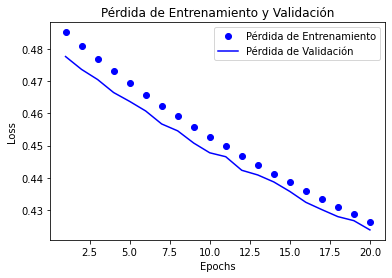

In [23]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que sí mejora bastante el modelo con 20 épocas, puesto que la pérdida de los datos de validación y de los datos de entrenamiento son muy similares. Aunque, la pérdida de validación es mayor a partir de la decimoséptima iteración.

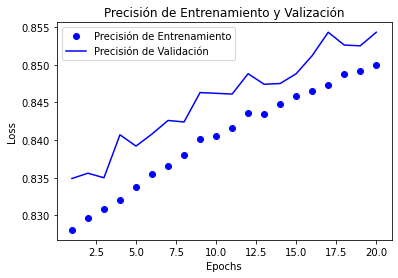

In [24]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que también mejora bastante el modelo cuanto mayor sea el número de épocas, aunque a partir de la decimoséptima iteración la pracesión de entrenamiento es mayor que la de validación, pero en ningún caso se produce sobreentrenamiento.

### Caso 2

In [25]:
red2.compile(optimizer='sgd', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red2.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 6s 50ms/step - loss: 0.4475 - accuracy: 0.8406 - val_loss: 0.4367 - val_accuracy: 0.8463
Epoch 2/20
98/98 [==============================] - 5s 46ms/step - loss: 0.4412 - accuracy: 0.8446 - val_loss: 0.4319 - val_accuracy: 0.8502
Epoch 3/20
98/98 [==============================] - 4s 43ms/step - loss: 0.4378 - accuracy: 0.8446 - val_loss: 0.4301 - val_accuracy: 0.8482
Epoch 4/20
98/98 [==============================] - 5s 46ms/step - loss: 0.4322 - accuracy: 0.8481 - val_loss: 0.4237 - val_accuracy: 0.8539
Epoch 5/20
98/98 [==============================] - 4s 43ms/step - loss: 0.4294 - accuracy: 0.8487 - val_loss: 0.4253 - val_accuracy: 0.8479
Epoch 6/20
98/98 [==============================] - 4s 44ms/step - loss: 0.4239 - accuracy: 0.8516 - val_loss: 0.4313 - val_accuracy: 0.8455
Epoch 7/20
98/98 [==============================] - 4s 43ms/step - loss: 0.4236 - accuracy: 0.8505 - val_loss: 0.4254 - val_accuracy: 0.8475
Epoch 8/20
98

[0.44754156470298767, 0.4412471354007721, 0.43783941864967346, 0.4322100281715393, 0.42935752868652344, 0.42393729090690613, 0.42359983921051025, 0.4195628762245178, 0.4155564308166504, 0.4101700782775879, 0.40777090191841125, 0.4068591296672821, 0.40410539507865906, 0.4019918739795685, 0.4022381901741028, 0.39918604493141174, 0.39483559131622314, 0.38897910714149475, 0.39083483815193176, 0.38645118474960327]
[0.8406400084495544, 0.8445600271224976, 0.8445600271224976, 0.8480600118637085, 0.8486599922180176, 0.851580023765564, 0.8505399823188782, 0.8513000011444092, 0.8532000184059143, 0.8549200296401978, 0.8557800054550171, 0.8556200265884399, 0.85698002576828, 0.8571599721908569, 0.8570799827575684, 0.8570799827575684, 0.8597999811172485, 0.8624600172042847, 0.860759973526001, 0.8615800142288208]
[0.43671146035194397, 0.43188241124153137, 0.43013301491737366, 0.4236902892589569, 0.42530328035354614, 0.43130332231521606, 0.42535609006881714, 0.40509167313575745, 0.40777379274368286, 0

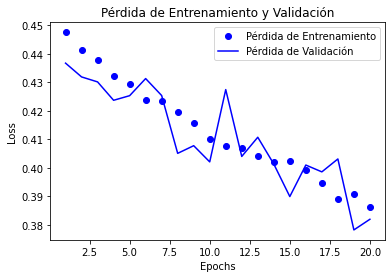

In [26]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que la pérdida de validación se comporta de manera totalmente diferente que la pérdida de entrenamiento y que la pérdida de validación inicial es la menor de todas las pérdidas de validación. Aunque es mayor a la de entrenamiento. Creemos que con dos épocas de entrenamiento sería suficiente.

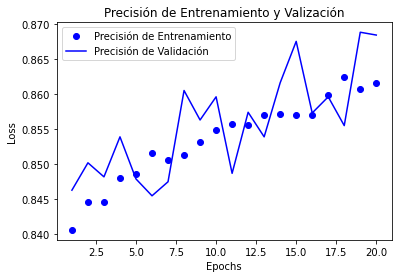

In [27]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que la precisión de entrenamiento es mayor cuantas más épocas realicemos. Por otro lado, la de validación es menor a la de entrenamiento y a partir de la tercera iteración se vuelve un poco caótica. 

### Caso 3

In [28]:
red3.compile(   optimizer = 'Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = red3.fit(partial_x_train,
                   partial_y_train,
                   epochs  = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
98/98 [==============================] - 5s 45ms/step - loss: 0.1567 - accuracy: 0.9434 - val_loss: 0.1475 - val_accuracy: 0.9438
Epoch 2/20
98/98 [==============================] - 4s 43ms/step - loss: 0.1365 - accuracy: 0.9511 - val_loss: 0.1530 - val_accuracy: 0.9417
Epoch 3/20
98/98 [==============================] - 4s 43ms/step - loss: 0.1225 - accuracy: 0.9559 - val_loss: 0.1487 - val_accuracy: 0.9435
Epoch 4/20
98/98 [==============================] - 4s 43ms/step - loss: 0.1098 - accuracy: 0.9614 - val_loss: 0.1551 - val_accuracy: 0.9416
Epoch 5/20
98/98 [==============================] - 4s 43ms/step - loss: 0.0968 - accuracy: 0.9659 - val_loss: 0.1535 - val_accuracy: 0.9438
Epoch 6/20
98/98 [==============================] - 4s 43ms/step - loss: 0.0848 - accuracy: 0.9707 - val_loss: 0.1519 - val_accuracy: 0.9434
Epoch 7/20
98/98 [==============================] - 5s 46ms/step - loss: 0.0771 - accuracy: 0.9731 - val_loss: 0.1670 - val_accuracy: 0.9422
Epoch 8/20
98

[0.15672990679740906, 0.1364518702030182, 0.12245799601078033, 0.10979907214641571, 0.0967659056186676, 0.08484410494565964, 0.07710156589746475, 0.07084771990776062, 0.05982166528701782, 0.05393083021044731, 0.04574432224035263, 0.04264768958091736, 0.0341976173222065, 0.031951744109392166, 0.028847338631749153, 0.021129975095391273, 0.016849054023623466, 0.014459725469350815, 0.010946499183773994, 0.009106508456170559]
[0.9434199929237366, 0.9510800242424011, 0.9558799862861633, 0.9613999724388123, 0.9659199714660645, 0.9707199931144714, 0.9730600118637085, 0.9752600193023682, 0.9797000288963318, 0.9813399910926819, 0.9847599864006042, 0.9861000180244446, 0.9887199997901917, 0.9900000095367432, 0.990880012512207, 0.9934800267219543, 0.9956600069999695, 0.9961599707603455, 0.9975200295448303, 0.9984400272369385]
[0.14751657843589783, 0.15299631655216217, 0.14871720969676971, 0.15514208376407623, 0.15349005162715912, 0.15188418328762054, 0.1670018583536148, 0.17710089683532715, 0.16490

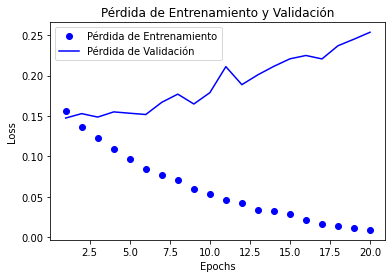

In [29]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['accuracy'])
print(history_dict['val_loss'])
print(history_dict['val_accuracy'])

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Se puede observar que el modelo con 20 épocas no mejora más con más épocas, puesto que la pérdida de los datos de entrenamiento ya es muy baja desde el inicio y la de los datos de validación aumenta según aumentan las pérdidas. Creemos que con dos o tres épocas sería suficiente.

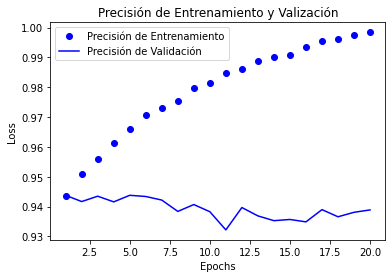

In [30]:

plt.clf()
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Aquí vemos que tampoco mejora bastante el modelo cuanto mayor sea el número de épocas.  
Tras evaluar el modelo con los datos de validación, vemos que como ya sabíamos previamente, los modelos con padding y con más filtros necesitan menos épocas para funcionar igual de bien, es decir, son mejores.

## 7. PREDICCIONES SOBRE LAS IMÁGENES DE _TEST_
Vamos a realizar predicciones para las 14 primeras imágenes con cada uno de los tres modelos. Después comentaremos los resultados para la sexta imagen.  
Primero vemos que la sexta imagen corresponde con unos pantalones.

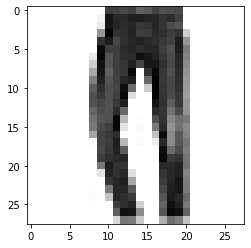

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Después creamos la función plot_image para ir mostrando por pantalla las distintas predicciones.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

### Caso 1

In [ ]:
predictions = red1.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[1.3472604e-02 9.6461552e-01 5.8377162e-04 6.8395800e-04 1.3488210e-02
 1.0544972e-05 7.0582400e-03 2.0112268e-06 8.4911822e-05 1.9373891e-07]
[[5.91972935e-07 9.24511880e-08 2.09253576e-05 ... 1.30481511e-01
  1.84468236e-02 7.37740338e-01]
 [1.74893085e-02 1.13988564e-04 8.62250388e-01 ... 2.27990245e-06
  9.31565184e-03 4.62036231e-04]
 [6.11246040e-04 9.98774350e-01 2.67967425e-05 ... 1.31360525e-06
  8.89452713e-06 2.13266063e-07]
 ...
 [6.67527094e-02 7.14830458e-05 6.83743060e-02 ... 1.22144178e-04
  5.41389525e-01 3.96394535e-06]
 [1.27475068e-04 9.96956348e-01 7.29025051e-05 ... 2.78405787e-05
  6.15489535e-06 4.27325904e-06]
 [1.70607764e-05 3.14210865e-06 5.02688752e-04 ... 1.00003823e-03
  9.89499986e-01 1.67691207e-03]]


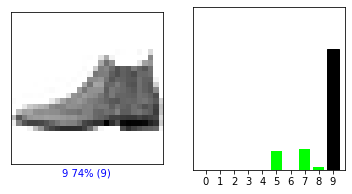

<Figure size 432x288 with 0 Axes>

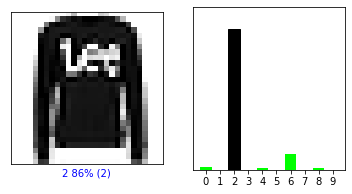

<Figure size 432x288 with 0 Axes>

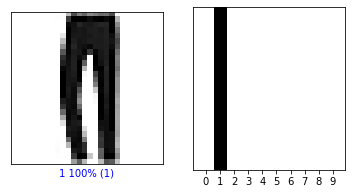

<Figure size 432x288 with 0 Axes>

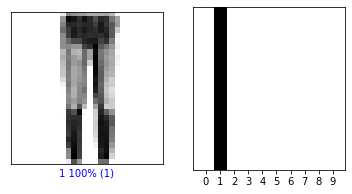

<Figure size 432x288 with 0 Axes>

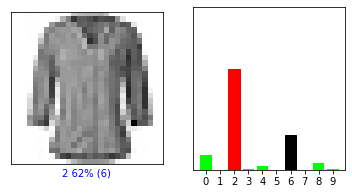

<Figure size 432x288 with 0 Axes>

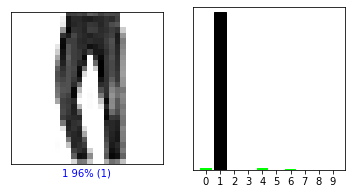

<Figure size 432x288 with 0 Axes>

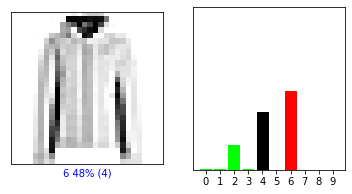

<Figure size 432x288 with 0 Axes>

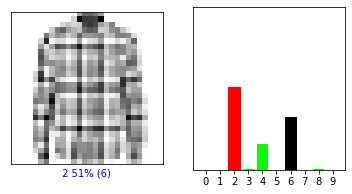

<Figure size 432x288 with 0 Axes>

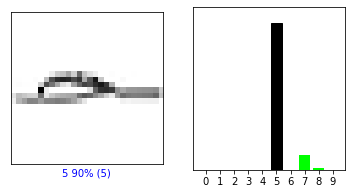

<Figure size 432x288 with 0 Axes>

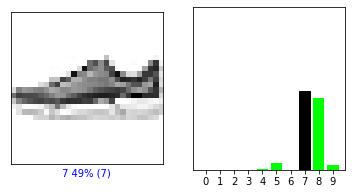

<Figure size 432x288 with 0 Axes>

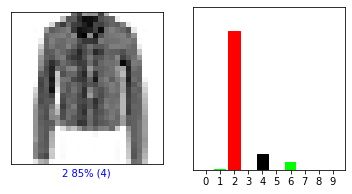

<Figure size 432x288 with 0 Axes>

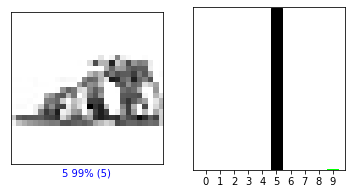

<Figure size 432x288 with 0 Axes>

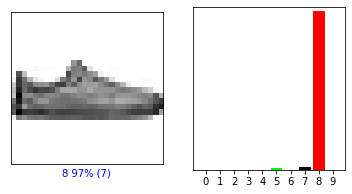

<Figure size 432x288 with 0 Axes>

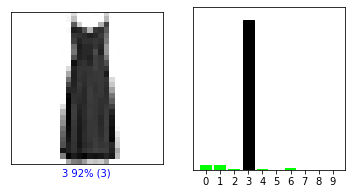

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

predictions = red1.predict(test_images)
for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Las líneas negras representan la probabilidad más alta y por tanto, la predicción. Las verdes, el porcentaje de ocasiones en que se equivoca y con que prendas se confunde. Cuando la línea es roja, es porque ha errado la predicción.  
Con esta red la predicción comete errores sobre todo en las prendas que no son pantalones, concretamente las zapatillas que predice un 95% que son mochilas. Tampoco predice correctamente las camisas. Con respecto a la sexta imagen predice al 100% que es 1, es decir, pantalones.

### Caso 2

In [ ]:
predictions = red2.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


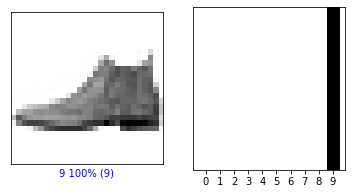

<Figure size 432x288 with 0 Axes>

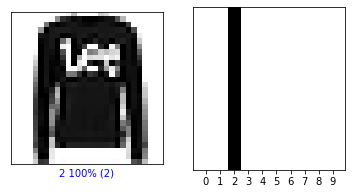

<Figure size 432x288 with 0 Axes>

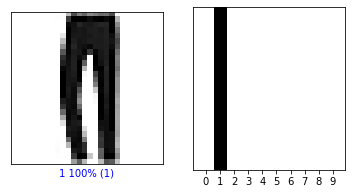

<Figure size 432x288 with 0 Axes>

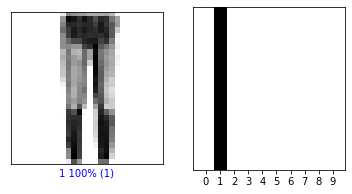

<Figure size 432x288 with 0 Axes>

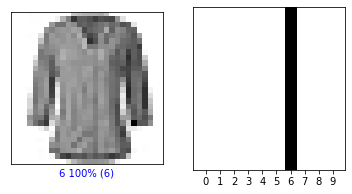

<Figure size 432x288 with 0 Axes>

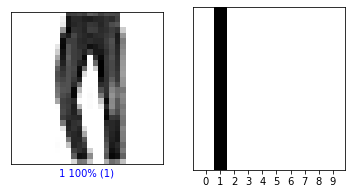

<Figure size 432x288 with 0 Axes>

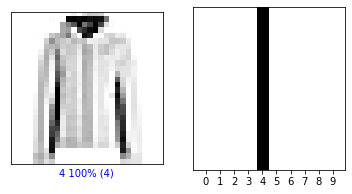

<Figure size 432x288 with 0 Axes>

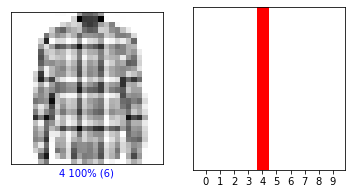

<Figure size 432x288 with 0 Axes>

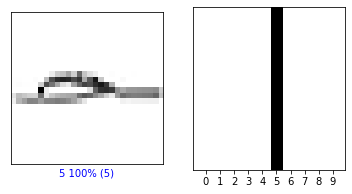

<Figure size 432x288 with 0 Axes>

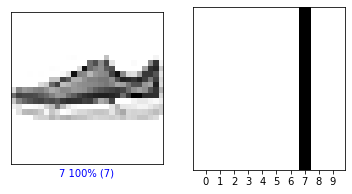

<Figure size 432x288 with 0 Axes>

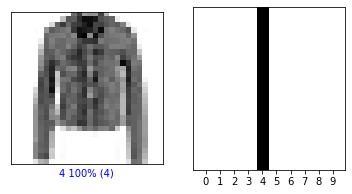

<Figure size 432x288 with 0 Axes>

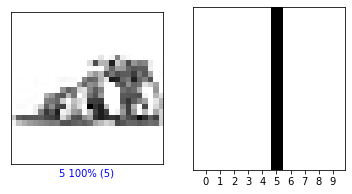

<Figure size 432x288 with 0 Axes>

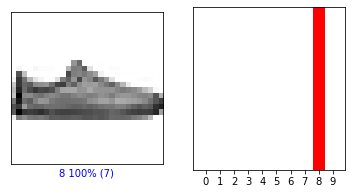

<Figure size 432x288 with 0 Axes>

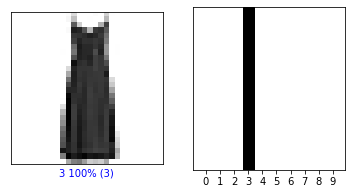

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


predictions = red2.predict(test_images)
for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción es del 100% de la sexta imagen. En el resto de casos predice de forma totalmente correcta casi todas las imagenes, menos una camisa, unas chanclas y unas zapatillas, en donde el error es del 100%.
### Caso 3

In [ ]:
predictions = red3.predict(test_images)
print(np.argmax(predictions[5]))
print(predictions[5])
np.sum(predictions[5])
print(predictions)

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3934868e-23
  9.9069691e-01 0.0000000e+00]]


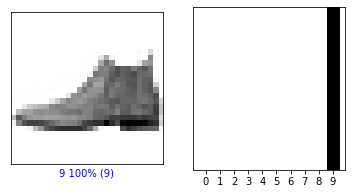

<Figure size 432x288 with 0 Axes>

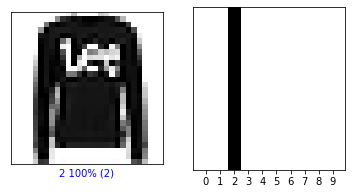

<Figure size 432x288 with 0 Axes>

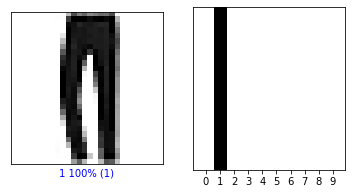

<Figure size 432x288 with 0 Axes>

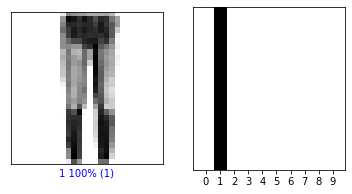

<Figure size 432x288 with 0 Axes>

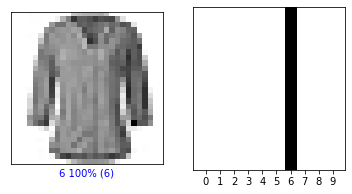

<Figure size 432x288 with 0 Axes>

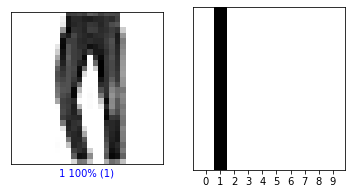

<Figure size 432x288 with 0 Axes>

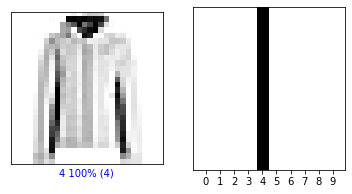

<Figure size 432x288 with 0 Axes>

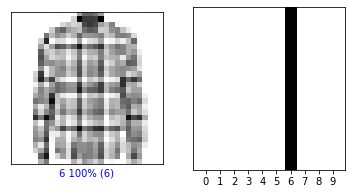

<Figure size 432x288 with 0 Axes>

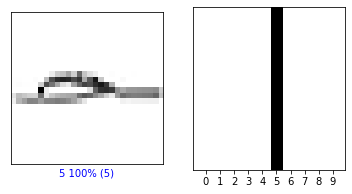

<Figure size 432x288 with 0 Axes>

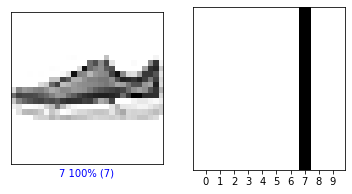

<Figure size 432x288 with 0 Axes>

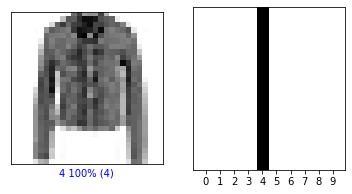

<Figure size 432x288 with 0 Axes>

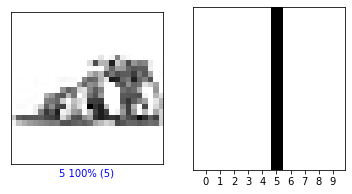

<Figure size 432x288 with 0 Axes>

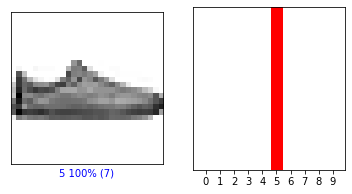

<Figure size 432x288 with 0 Axes>

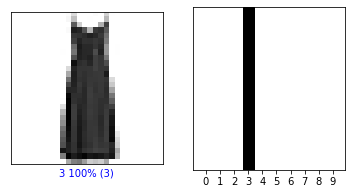

<Figure size 432x288 with 0 Axes>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


predictions = red3.predict(test_images)
for i in range(14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Con esta red la predicción de la sexta figura sigue siendo del 100%. Con respecto al resto de imágenes, las predice todas al 100%, excepto las zapatillas, la decimotercera imagen.  
Como conclusión, pensamos que el modelo del caso 3 es el mejor, puesto que solo predice erróneamente una imagen. Mientras que el resto las predice correctamente al 100%. Coincidiendo así, con lo visto anteriormente.

## 8. COMPARACIÓN DE LOS RESULTADOS DE LA PRÁCTICA 1 CON LAS CAPAS DENSE
En la práctica anterior con las capas dense, el mejor modelo tenía une precisión del 87% y una pérdida del 34%. Mientras que con las capas convolucionales, la mejor red tiene un 90% de precisión y un 25% de pérdida. De esto concluimos, que el modelo con capas convolucionales es mejor.  
Respecto a las predicciones, en general las redes convolucionales nos dan mejores resultados, ya que las predicciones son del 100% en la mayoría de casos. Por otro lado, las predicciones que realizan erroneamente lo hacen con un 100% de fallo, sin embargo, las de la primera práctica lo hacían con menos porcentaje de error. Creemos que esto se debe a que las redes convolucionales obtienen información más detallada de los datos de entrenamiento, y en ocasiones demasiado específica. Por este motivo, cuando la predicción es correcta, lo es al 100% y cuando es incorrecta, también lo es al 100%.  
También nos hemos dado cuenta, de que el tiempo de ejecución del entrenamiento de las redes ha aumentado para las de la segunda práctica.  
Por último, en ambas prácticas los modelos con el optimizador *adam* funcionan mejor. 


## 9. CONCEPTOS DE BATCH_NORMALIZATION Y DROPOUT
*batch_normalization:*  
Aplica una transformación que mantiene la media de salida cercana a 0 y la desviación estándar de salida cercana a 1.
Normalizando los datos, las distancias de los datos van de 0 a 1 y esto ayuda a la red neuronal a trabajar mejor y a tener menos problemas.
Cuando normalizamos los datos solo la capa de entrada se beneficia de esto, conforme los datos pasan por otras capas ocultas, esta normalización se va perdiendo, y si tenemos una red neuronal con muchas capas podemos tener problemas con el entrenamiento. El método de batch_normalization normaliza los datos antes de que pasen por la función de activación en cada capa que de la red neuronal, de esta manera siempre tendremos los datos normalizados.
Si normalizamos los datos las distribuciones estarán más cerca y será más fácil para la red neuronal crear una línea de decisión.
Hay que tener en cuenta que trabaja de forma distinta durante el entrenamiento y con los datos de test.

*Dropout:*  
Este método ayuda a reducir el overfitting, ya que las neuronas cercanas suelen aprender patrones que se relacionan. Estas relaciones pueden llegar a formar un patrón muy específico con los datos de entrenamiento. Con dropout esta dependencia entre neuronas es menor en toda la red neuronal, de esta manera las neuronas trabajan mejor de forma solitaria y no dependen tanto de las relaciones con las neuronas vecinas.
Dropout tiene un parámetro que indica la probabilidad de que las neuronas se queden activadas. Este parámetro toma valores de 0 a 1. Si los valores son cercanos a 0, dropout desactivará menos neuronas, si es cercano a 1, desactivará muchas más neuronas. Dropout solo se usa durante la fase de entrenamiento.

## 10. CONCEPTOS DE CALLBACKS
Un *callback* puede realizar acciones en distintas etapas del entrenamiento, al inicio o al final de una época, antes o después de un lote, etcetera. Son utiles para guardar periódicamente un modelo en el disco, para hacer una parada anticipada o para obtener una visión de los estados internos y las estadísticas de un modelo durante el entrenamiento, por ejemplo.

También son útiles para escribir los logs de TensorBoard después de cada lote de entrenamiento para monitorizar tus métricas. TensorBoard permite visualizar las métricas  durante el entrenamiento tanto en el conjunto de entrenamiento como en el conjunto de validación, como en el de prueba.

En nuestro modelo estamos utilizando los *callbacks* monitorizando la precisión y la función de perdida. Nos ha ayudado para evitar el *overfitting* y saber el número adecuado de épocas a realizar.

## 11.CONCLUSIÓN
Realizando la práctica hemos aprendido a crear modelos con redes convolucionales, y que estos aunque tarden más en ejecutarse, funcionan mejor que las redes con capas dense. También hemos aprendido que el optimizador *adam* suele funcionar mejor en la mayoría de modelos.  Además, sabemos como graficar el comportamiento de los modelos y saber el número adecuado de iteraciones para evitar sobreentrenamiento. Por último nos gustaría destacar, que una red con capas convolucionales necesita capas dense para que funcione con mejores resultados.  
Para realizar este proyecto nos hemos reunido, tanto presencial como virtualmente, y en general, hemos hecho el trabajo conjuntamente, salvo algunas investigaciones sobre algunos conceptos como *dropout*, *callbacks*, etc, que hemos hecho individualmente. 


## 12. BIBLIOGRAFÍA

*   Team, K. (s. f.). Keras documentation: Callbacks API. Keras. Recuperado 26 de noviembre de 2021, de https://keras.io/api/callbacks/
*   tf.keras.callbacks.LearningRateScheduler | TensorFlow Core v2.7.0. (s. f.). TensorFlow. Recuperado 26 de noviembre de 2021, de https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
*   Team, K. (s. f.-b). Keras documentation: Dropout layer. Keras. Recuperado 26 de noviembre de 2021, de https://keras.io/api/layers/regularization_layers/dropout/
*   Team, K. (s. f.-a). Keras documentation: BatchNormalization layer. Keras. Recuperado 26 de noviembre de 2021, de https://keras.io/api/layers/normalization_layers/batch_normalization/




